In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 1. Loading the dataset

In [2]:
df=pd.read_csv("diabetes.csv", header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


In [4]:
df.shape

(759, 9)

The table has no missing values which means we can move forward with visualization and modelling

### 2. Preprocess the data as you see fit

#### 2.1 Checking for missing values 

In [5]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

No Missing values

#### 2.2 To check if the values are Normalized

In [6]:
min(df.iloc[:,:-1].min())

-0.994876

In [7]:
max(df.iloc[:,:-1].max())

1.0

Data already Scaled 

#### 2.3 Duplicate values

In [8]:
duplicate = df[df.duplicated()]
duplicate

,0,1,2,3,4,5,6,7,8


Since the values are already normalized, has no missing and duplicate values, we don't need to pre-process it. 

#### 2.3 Renaming label column

In [9]:
df=df.rename(columns={8: "label"})
df.head()

,0,1,2,3,4,5,6,7,label
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


### 3. Split into 80% train 20% test

In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### 4. Modify the model shown in the demo to take the new data

In [11]:
model = tf.keras.Sequential([tf.keras.layers.Dense(16, input_shape= [8,]),
                                    tf.keras.layers.Dense(16,activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])

The only change needed was changing the input shape

### 5. Train the model on the data

In [12]:
example_loss = tf.keras.losses.MeanSquaredError()

In [13]:
model.compile(optimizer='adam',
                     loss=example_loss,
                     metrics=['mean_squared_error'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
19/19 [==============================] - 0s 1ms/step - loss: 0.2493 - mean_squared_error: 0.2493
Epoch 2/5
19/19 [==============================] - 0s 922us/step - loss: 0.2359 - mean_squared_error: 0.2359
Epoch 3/5
19/19 [==============================] - 0s 790us/step - loss: 0.2244 - mean_squared_error: 0.2244
Epoch 4/5
19/19 [==============================] - 0s 842us/step - loss: 0.2134 - mean_squared_error: 0.2134
Epoch 5/5
19/19 [==============================] - 0s 1000us/step - loss: 0.2048 - mean_squared_error: 0.2048


### 6. Make predictions on the test data and compare them to the test labels

In [16]:
# making predictions on the test set
y_pred = model.predict(x_test)

#converting continous values into between 0 and 1 using a threshold of 0.5
y_pred = np.where(y_pred > 0.5, 1, 0)

In [17]:
len(y_pred)

152

In [18]:
df_compare=pd.DataFrame(columns=['Actual labels', 'Predicted labels'])
df_compare['Actual labels']= y_test
df_compare['Predicted labels']= y_pred

In [19]:
df_compare.head()

,Actual labels,Predicted labels
747,1,1
583,1,1
575,1,1
40,1,1
243,1,1


#### Confusion matrix 

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 8, 48],
       [ 1, 95]], dtype=int64)

In [21]:
target_names=['non-diabetic','diabetic']

Text(0.5, 69.0, 'Predicted')

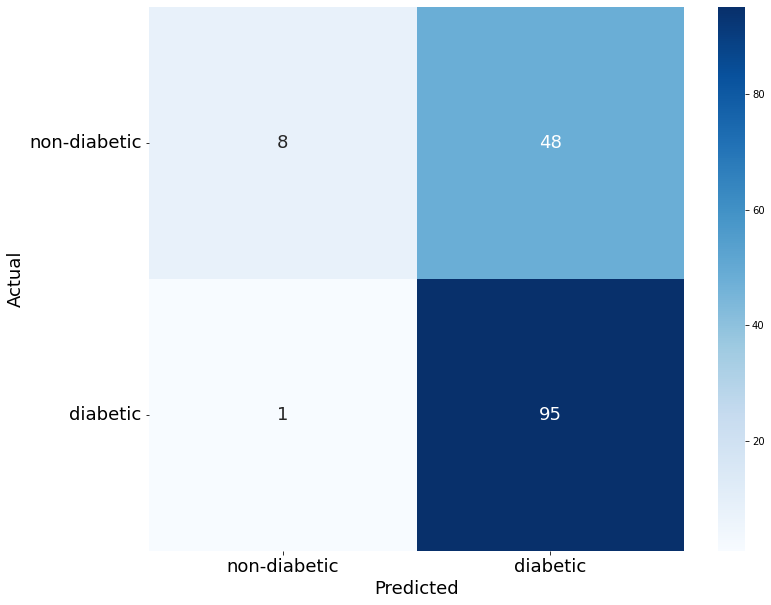

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues',annot_kws={"size": 18})
ax.xaxis.set_ticklabels(target_names, rotation=0, fontsize=18)
ax.yaxis.set_ticklabels(target_names, rotation=0,fontsize=18)
ax.set_ylabel('Actual',fontsize=18)
ax.set_xlabel('Predicted',fontsize=18)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.14      0.25        56
           1       0.66      0.99      0.79        96

    accuracy                           0.68       152
   macro avg       0.78      0.57      0.52       152
weighted avg       0.75      0.68      0.59       152



### 7. Calculate the accuracy of your results

In [24]:
print("Test accuracy score", round(accuracy_score(y_pred, y_test),2))

Test accuracy score 0.68


We can see that the test accuracy score was 68%. It can be improved by fine tuning the current model 

### 8. Hypothesize a change you can make to the model. Type out your hypothesis as comments in the code or in a text cell

#### 8.1 Data Augmentation

In [25]:
model_new = tf.keras.Sequential([tf.keras.layers.Dense(1024, input_shape= [8,]),
                                    tf.keras.layers.Dense(1024,activation='relu'),
                                 #tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.Dense(256,activation='relu'),
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.Dense(128,activation='relu'),
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.Dense(64,activation='relu'), 
                                 tf.keras.layers.Dense(32,activation='relu'),
                                 tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])

In [26]:
model_new.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),loss=example_loss,
                     metrics=['mean_squared_error'])

In [27]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              9216      
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)              

In [28]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

#### Things tried:

1. <B>Adding multiple layers:</B> I added layers upto 1024 so that the model tries to fit all the training data. This might cause overfitting problems which I've solved using DropOut. 

2. <B>BatchNormalization:</B> Implemented batchnormalization so that the output after everylayer stays between 0 and 1. This maintains the data destribution. 

3. <B>DropOut:</B> Adding multiple layers to the model makes it more complicated and it tries to fit the training data completely. However, this creates a problem for the testing data as the model is not generalized for new data rather it is specific for the training data. DropOut randomly deletes some nodes during training. 

4. <B>Learning rate:</B> Choosing current learning rates is very important otherwise the model would never converge to global minima. 

5. <B>Early stopping callback:</B> Early stopping utilizes resources by stating the condition for the model to stop in case there is no increase in val accuracy/ val loss. It also let's you restore best weights during training. 

### 9.Test your hypothesis by training your edited model

In [29]:
model_new.fit(x_train,y_train,epochs=150, callbacks=[es], validation_data=(x_test, y_test))

Epoch 1/150
19/19 [==============================] - 1s 32ms/step - loss: 0.2349 - mean_squared_error: 0.2349 - val_loss: 0.2475 - val_mean_squared_error: 0.2475
Epoch 2/150
19/19 [==============================] - 0s 17ms/step - loss: 0.2016 - mean_squared_error: 0.2016 - val_loss: 0.2468 - val_mean_squared_error: 0.2468
Epoch 3/150
19/19 [==============================] - 0s 18ms/step - loss: 0.1831 - mean_squared_error: 0.1831 - val_loss: 0.2444 - val_mean_squared_error: 0.2444
Epoch 4/150
19/19 [==============================] - 0s 17ms/step - loss: 0.1737 - mean_squared_error: 0.1737 - val_loss: 0.2435 - val_mean_squared_error: 0.2435
Epoch 5/150
19/19 [==============================] - 0s 17ms/step - loss: 0.1650 - mean_squared_error: 0.1650 - val_loss: 0.2448 - val_mean_squared_error: 0.2448
Epoch 6/150
19/19 [==============================] - 0s 16ms/step - loss: 0.1621 - mean_squared_error: 0.1621 - val_loss: 0.2511 - val_mean_squared_error: 0.2511
Epoch 7/150
19/19 [=========

In [30]:
y_pred_new = model_new.predict(x_test)
y_pred_new= np.where(y_pred_new > 0.5, 1, 0)

### 10. Show the results of your changed model by repeating steps 6 and 7. Discuss the differences if any

In [31]:
df_comp_new=pd.DataFrame(columns=['Actual labels', 'Predicted labels'])
df_comp_new['Actual labels']= y_test
df_comp_new['Predicted labels']= y_pred_new
df_comp_new[5:10]

,Actual labels,Predicted labels
389,0,0
428,1,1
122,0,0
31,1,1
283,1,1


Text(0.5, 69.0, 'Predicted')

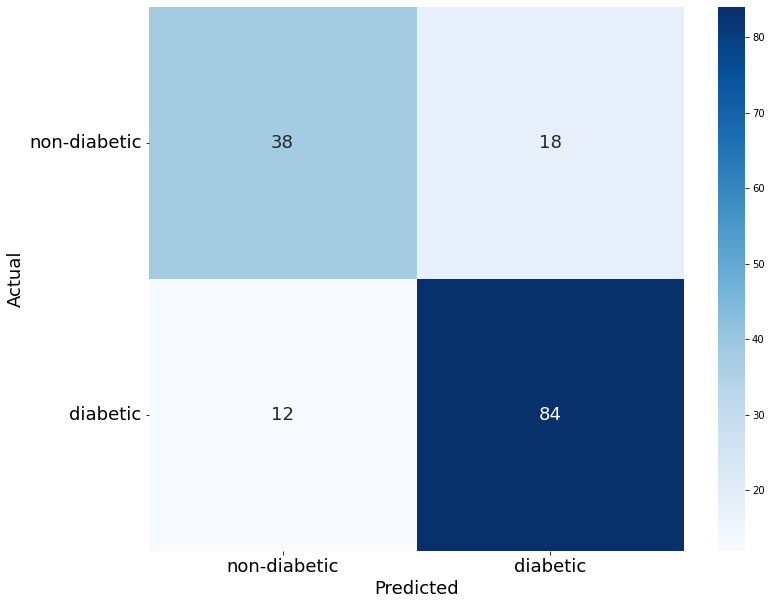

In [32]:
cm_new=confusion_matrix(y_test, y_pred_new)

plt.figure(figsize=(12,10))
ax= plt.subplot()
sns.heatmap(cm_new, annot=True, fmt='g', ax=ax, cmap='Blues',annot_kws={"size": 18})
ax.xaxis.set_ticklabels(target_names, rotation=0, fontsize=18)
ax.yaxis.set_ticklabels(target_names, rotation=0,fontsize=18)
ax.set_ylabel('Actual',fontsize=18)
ax.set_xlabel('Predicted',fontsize=18)

In [33]:
print("Test accuracy score (Hypothesis)", round(accuracy_score(y_test, y_pred_new),2))
print("Test accuracy score (sample)", round(accuracy_score(y_pred, y_test),2))

Test accuracy score (Hypothesis) 0.8
Test accuracy score (sample) 0.68


#### Differeneces: 

We can see that the test accuracy score for the sample and hypothesis has a difference of 0.12. Using a more complicated model with various parameters helps improve the accuracy of the model. 

Other classification algorithms such as SVM, Decision Trees, Logistic regression might work better for this problem as we have less data. 